In [182]:
import numpy as np
from optparse import OptionParser
import os
import cPickle
import os.path
import matplotlib.pyplot as plt
import scipy.interpolate as intp
from scipy.interpolate import interp1d
from matplotlib import cm
import re
from scipy import signal
from scipy.signal import hilbert
import sys

sys.path.insert(0, '../simulation')

import fluence as flu
import radiation_energy as rad
import sim_functions as sim
import helper as helper
import sim_functions as sim
import debug_sim as debug_sim

In [183]:
event_path='/Users/kmulrey/radio/events/'

In [253]:
a=10
type='proton'

In [254]:
filename=type+'_event_list.txt'
sim_dir=[]
runnr=[]
count=0

In [255]:
with open(filename) as f:
    for line in f:
        sim_dir.append(line.split()[0])
        
        runnr.append(line.split()[1])
        count=count+1



In [256]:
i=3
event= sim_dir[i].split('events/')[1].split('/')[0]
print '{0}  {1}'.format(sim_dir[i], runnr[i])

/Users/kmulrey/radio/events/225079654/1/coreas/proton/  000366


In [257]:
reload(debug_sim)
ant_pos,times,efield,zenith,az,energy,xmax=debug_sim.get_efield(sim_dir[i], runnr[i])

In [258]:
alpha=sim.GetAlpha(zenith,az,1.1837)

In [270]:
event='219052349'
#event='181702003'
#event='225079654'
#event='258531266'
atm=debug_sim.get_atm(event)
hi=helper.get_vertical_height(xmax,atm)   # height in cm
at=helper.get_atmosphere(hi,atm)
rho=helper.get_density(hi, atm, allow_negative_heights=True)
dmax=helper.get_distance_xmax_geometric(zenith, xmax, atm)
print atm

[[ 0.00000000e+00  3.64865365e+05  9.31632259e+05  2.57338512e+06
   1.00000000e+07]
 [-9.01485438e+01 -9.90580353e+01 -1.46015759e+00  7.59642840e-04
   1.12829200e-02]
 [ 1.14790454e+03  1.15589222e+03  1.20402690e+03  1.36704821e+03
   1.00000000e+00]
 [ 9.12461520e+05  9.23025382e+05  7.09189394e+05  6.76781922e+05
   1.00000000e+09]]


In [271]:
heights=np.arange(0,25e5,1e2)
density=helper.get_density(heights,atm)

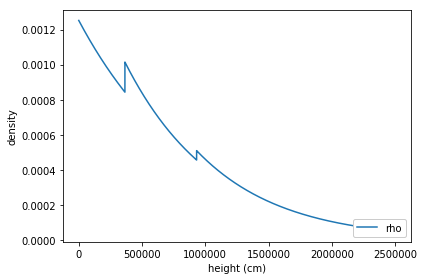

In [272]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)#,aspect=1)

ax1.plot(heights,density,label='rho')

ax1.legend(numpoints=1,loc='lower right',framealpha=1,facecolor='white')
#ax1.axis([50,200,-0.0005,0.0002])
ax1.set_xlabel('height (cm)')
ax1.set_ylabel('density')


#ax1.set_ylim([-0.0003, 0.0002])
#ax2.set_ylim([-0.0003, 0.0002])


plt.tight_layout()

plt.show()

In [273]:
layers=np.asarray([0.00000000E+00,3.62842688E+05,9.13489036E+05,2.55649441E+06,1.00000000E+07])
atmA=np.asarray([-9.76096555E+01,-1.16961278E+02,1.69899898E+002,4.26086374E-04,1.12829200E-02])
atmB=np.asarray([1.15877823E+03,1.17611896E+03,1.23947417E+03,1.05499728E+03,1.00000000E+00])
atmC=np.asarray([8.99736190E+05,9.22225343E+05,6.71688536E+05,7.13085680E+05,1.00000000E+09])
heights=np.arange(0,110e5,1e2)

In [274]:

def return_density(h):
    rho=np.zeros([len(h)])
    
    for i in np.arange(len(h)):
        #print layers[0],h[i],layers[1]
        
        if h[i]>=layers[0] and h[i]<layers[1]:
            rho[i]=atmB[0]/atmC[0]*np.exp(-1*h[i]/atmC[0])

        if h[i]>layers[1] and h[i]<layers[2]:
            rho[i]=atmB[1]/atmC[1]*np.exp(-1*h[i]/atmC[1])
        if h[i]>layers[2] and h[i]<layers[3]:
            rho[i]=atmB[2]/atmC[2]*np.exp(-1*h[i]/atmC[2])
        if h[i]>layers[3] and h[i]<layers[4]:
            rho[i]=atmB[3]/atmC[3]*np.exp(-1*h[i]/atmC[3])
        if h[i]>=layers[4]:
            rho[i]=-1*atmB[4]/atmC[4]
            
    return rho


In [275]:

def return_density(h):
    rho=0
    
    
    if h>=layers[0] and h<layers[1]:
        rho=atmB[0]/atmC[0]*np.exp(-1*h/atmC[0])

    if h>layers[1] and h<layers[2]:
        rho=atmB[1]/atmC[1]*np.exp(-1*h/atmC[1])
    if h>layers[2] and h<layers[3]:
        rho=atmB[2]/atmC[2]*np.exp(-1*h/atmC[2])
    if h>layers[3] and h<layers[4]:
        rho=atmB[3]/atmC[3]*np.exp(-1*h/atmC[3])
    if h>=layers[4]:
        rho=-1*atmB[4]/atmC[4]
            
    return rho


In [276]:
reload(debug_sim)
density=debug_sim.return_density_array(heights,atm)
overburden=debug_sim.return_overburden_array(heights,atm)
print xmax
#278934.51287600904
#0.0009424500037839451

752.19


In [277]:
reload(debug_sim)
hi=debug_sim.get_vertical_height(xmax,atm)   # height in cm
at=debug_sim.get_atmosphere(hi,atm)
rho=debug_sim.return_density(hi, atm)
print hi
print rho

282417.25678789115
0.0009231496620262956


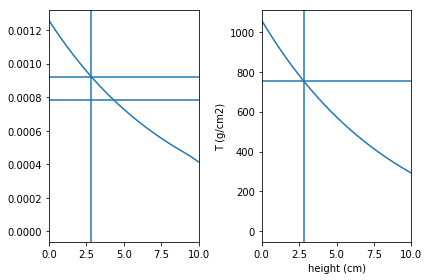

In [278]:
fig = plt.figure() 
ax1 = fig.add_subplot(1,2,1)#,aspect=1) 
ax2 = fig.add_subplot(1,2,2)#,aspect=1)
ax1.plot(heights/1e5,density,label='rho')
ax1.axvline(x=hi/1e5)
ax1.axhline(y=rho)
ax1.axhline(y=rho*np.cos(zenith))

#ax1.legend(numpoints=1,loc='lower right',framealpha=1,facecolor='white')

#ax1.axis([50,200,-0.0005,0.0002]) ax1.set_xlabel('height (cm)') ax1.set_ylabel('density')

ax1.set_xlim([0,10])
ax2.plot(heights/1e5,overburden,label='T') 
ax2.axhline(y=xmax)
ax2.axvline(x=hi/1e5)

#ax1.legend(numpoints=1,loc='lower right',framealpha=1,facecolor='white')
ax2.set_xlim([0,10])
#ax2.set_ylim([0,40e5])

ax2.set_xlabel('height (cm)') 
ax2.set_ylabel('T (g/cm2)') 
#ax2.set_yscale('log')

plt.tight_layout()

plt.show()

In [279]:
atm=sim.get_atm(event)
hi=helper.get_vertical_height(xmax,atm)   # height in cm
at=helper.get_atmosphere(hi,atm)
#rho=debug_sim.return_density_array(hi, atm)
rho=debug_sim.return_density(hi, atm)

dmax=helper.get_distance_xmax_geometric(zenith, xmax, atm)

In [269]:
print hi
print rho

278934.51287600904
0.0009445957424172722
